In [1]:
import pandas as pd
import numpy as np
# from datetime import *

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print(f'Matplotlib Version: {mpl.__version__}')
print(f'Seaborn Version: {sns.__version__}')

Matplotlib Version: 3.4.2
Seaborn Version: 0.11.2


In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 72D0-BC6E

 Directory of C:\Users\GIS\Documents\A.Udemy\Python\Forage\dataANZ

07/01/2022  09:04 PM    <DIR>          .
07/01/2022  09:04 PM    <DIR>          ..
07/01/2022  07:21 AM    <DIR>          .ipynb_checkpoints
03/10/2021  12:59 PM           330,622 1_DataANZ_Virtual_Internship_Program-Copy1.ipynb
03/10/2021  03:49 PM           464,612 1_DataANZ_Virtual_Internship_Program-Copy2.ipynb
31/12/2021  08:32 PM           450,747 1_DataANZ_Virtual_Internship_Program-Copy3.ipynb
07/01/2022  09:04 PM           385,692 1_prac.ipynb
01/10/2021  03:25 PM         1,782,724 ANZ synthesised transaction dataset.xlsx
01/10/2021  09:46 PM            17,348 DataANZ.docx
31/12/2021  08:46 PM           366,348 Taks_1_DataANZ_Virtual_Internship_Program_Submit.ipynb
05/10/2021  05:13 PM           500,967 Task_2_Predictive Analytics - Copy.ipynb
06/10/2021  06:02 PM           338,069 Task_2_Predictive Analytics.ipynb
02/01/2022  02:09 PM       

In [3]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 100

print(pd.get_option('display.max.columns'))
print(pd.get_option('display.max.rows'))

40
100


In [4]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
print(df.shape)
df.head()

(12043, 23)


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
# Duplicates
df.duplicated().sum()

0

In [7]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [8]:
df.describe(include = 'O')

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


In [9]:
df.describe(include = 'datetime', datetime_is_numeric=True)

,date
count,12043
mean,2018-09-15 21:27:39.951839232
min,2018-08-01 00:00:00
25%,2018-08-24 00:00:00
50%,2018-09-16 00:00:00
75%,2018-10-09 00:00:00
max,2018-10-31 00:00:00


In [10]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### Missing date

From 2018-08-15 to 2018-10-31

The following includes the start date, but the end time isn't included.

So, I have to add 1 day more to the result. 91 + 1 = 92

The total days are 92, but there are only 91 days. 

In [11]:
print('Min date time: {}' .format(min(df.date)))
print('Max date time: {}' .format(max(df.date)))

max(df.date) - min(df.date) # It includes the start date, but the end time isn't included.  


Min date time: 2018-08-01 00:00:00
Max date time: 2018-10-31 00:00:00


Timedelta('91 days 00:00:00')


https://www.geeksforgeeks.org/check-missing-dates-in-pandas/

Use pd.date_range() and Pandas.Index.difference() to find the missing date.

The missing date is 2018-08-16.

In [12]:
date_range = pd.date_range(start=min(df.date), end=max(df.date), freq='D') # B - Business Day Frequency
print(date_range.difference(df['date']))

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)


In [13]:
# Missing values
missing = df.isnull().sum() # type is pd.Series
missing = missing[missing>0] # Select columns that contain missing values
missing_per = round(missing/len(df)*100, 2)
pd.DataFrame({'Num_of_missing': missing, 'Percentage (%)': missing_per})

,Num_of_missing,Percentage (%)
card_present_flag,4326,35.92
bpay_biller_code,11158,92.65
merchant_id,4326,35.92
merchant_code,11160,92.67
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92


Why are 4326 of 'card_present_flag', 'merchant_id', 'merchant_suburb', 'merchant_state', 'merchant_long_lat' missing? 

Their txn_description is PAY/SALARY, PAYMENT, INTER BANK, and PHONE BANK. 

Because the above transactions were made between banks, they don't have 'card_present_flag', 'merchant_id', 'merchant_suburb', 'merchant_state', 'merchant_long_lat'?

If so, can I fill them with NULL? 

Drop bpay_biller_code and merchant_code and fill the empty entities in the other columns with NULL


In [14]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [15]:
2600+883+742+101

4326

In [16]:
print(df[df['card_present_flag'].isnull()].txn_description.value_counts())
print(df[df['merchant_id'].isnull()].txn_description.value_counts())
print(df[df['merchant_suburb'].isnull()].txn_description.value_counts())
print(df[df['merchant_state'].isnull()].txn_description.value_counts())
print(df[df['merchant_long_lat'].isnull()].txn_description.value_counts())

PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


Drop bpay_biller_code and merchant_code

In [17]:
df1 = df.drop(columns=['bpay_biller_code', 'merchant_code'])
print(df.shape, df1.shape)

(12043, 23) (12043, 21)


In [18]:
df1 = df1.fillna(value = 'NULL')
df1.isnull().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

In [19]:
df1.nunique().sort_values()

country                  1
currency                 1
status                   2
gender                   2
movement                 2
card_present_flag        3
txn_description          6
merchant_state           9
age                     33
first_name              80
date                    91
customer_id            100
long_lat               100
account                100
merchant_suburb       1610
merchant_long_lat     2704
amount                4457
merchant_id           5726
extraction            9442
balance              12006
transaction_id       12043
dtype: int64

## Columns unique values < 25

In [20]:
# Create age_group
df1['age_group'] = pd.cut(df.age, [0, 20, 30, 40, 50 ,60, 999], labels = ['<20', '20-30', '31-40', '41-50', '51-60', '61+'])

In [21]:
# Select columns whose unique values are between 2 and 25
# cat - categorical
cat_cols_list = [col for col in df1.columns if (df1[col].nunique() > 1) & (df1[col].nunique() < 25)]
# cat_cols_list.remove('age')
cat_cols_list

['status',
 'card_present_flag',
 'txn_description',
 'gender',
 'merchant_state',
 'movement',
 'age_group']

In [22]:
df1[cat_cols_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   status             12043 non-null  object  
 1   card_present_flag  12043 non-null  object  
 2   txn_description    12043 non-null  object  
 3   gender             12043 non-null  object  
 4   merchant_state     12043 non-null  object  
 5   movement           12043 non-null  object  
 6   age_group          12043 non-null  category
dtypes: category(1), object(6)
memory usage: 576.6+ KB


In [23]:
import pdb

In [24]:
# show the percecntage of each bar type plots
def plot_height_per(df, ax):
    total = float(len(df))
    if ax == 0:
        ax.text('0', ha = 'center')
    height_list = []
    for p in ax.patches:
        height = p.get_height()
        if np.isnan(height):
            height = 0
        height_list.append(height)
        ax.text(p.get_x()+p.get_width()/2. ,
               height * 1.05,
               '{:.2%}'.format(height/total),
               ha='center')
    height_list.sort()
    ax.set(ylim= (0, height_list[-1]*1.15))
    
def plot_height(df, ax):
    height_list = []
    for p in ax.patches:
        height = p.get_height()
#         pdb.set_trace()
        if np.isnan(height):
            height = 0
        height_list.append(height)
        ax.text(p.get_x() + p.get_width()/2,
               height * 1.05,
               '{}'.format(round(height)),
               ha = 'center')
    height_list.sort()
    ax.set(ylim = (0, height_list[-1] * 1.15))

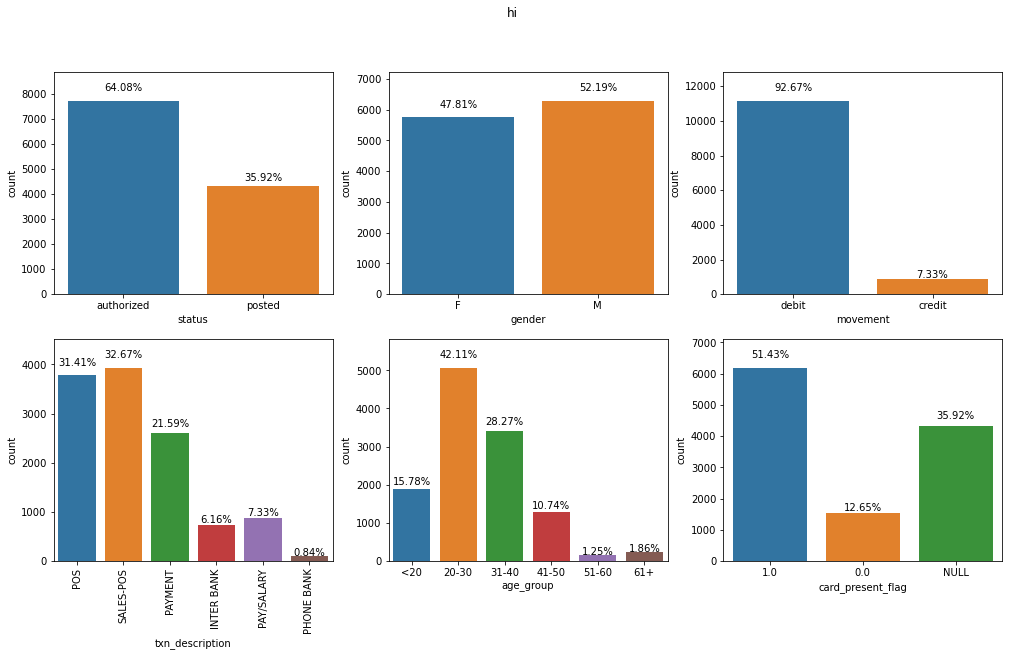

In [25]:
fig, axes = plt.subplots(2, 3, figsize = (17, 9))
fig.suptitle('hi')

ax_0 = sns.countplot(data = df1, x = 'status', ax = axes[0,0])
ax_1 = sns.countplot(data = df1, x = 'gender', ax = axes[0,1])
ax_2 = sns.countplot(data = df1, x = 'movement', ax = axes[0,2])
ax_3 = sns.countplot(data = df1, x = 'txn_description', ax = axes[1,0])
axes[1,0].set_xticklabels(df1['txn_description'].unique(), rotation = 90)
ax_4 = sns.countplot(data = df1, x = 'age_group', ax = axes[1,1])
ax_5 = sns.countplot(data = df1, x = 'card_present_flag', ax = axes[1,2])

plot_height_per(df1, ax_0)
plot_height_per(df1, ax_1)
plot_height_per(df1, ax_2)
plot_height_per(df1, ax_3)
plot_height_per(df1, ax_4)
plot_height_per(df1, ax_5)

plt.show()

# Movement

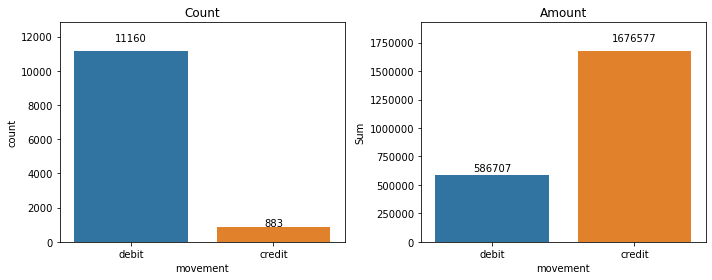

In [26]:
mv_sum = df.groupby('movement')['amount'].sum()
mv_count = df.groupby('movement')['amount'].count()

mv = pd.DataFrame({'Sum': mv_sum, 'Amount': mv_count})

fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0] = sns.countplot(data = df1, x = 'movement', order = ['debit', 'credit'], ax = ax[0])
ax[0].set_title('Count')

ax[1] = sns.barplot(data = mv, x = mv.index, y = 'Sum', order = ['debit', 'credit'], ax = ax[1])
ax[1].set_title('Amount')
plt.ticklabel_format(style = 'plain', axis = 'y') # To turn the scientific notation into plain numbers

# Show figures
plot_height(df1, ax[0])
plot_height(mv, ax[1])

plt.tight_layout() # When graphs are too close to each other, give some space bewteen them
plt.show()

## Gender and age group

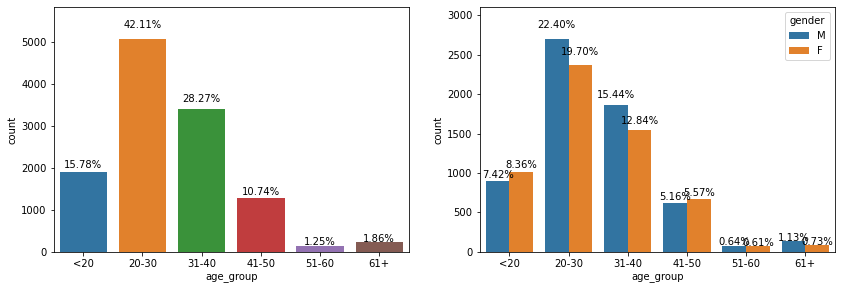

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4.5))

ax[0] = sns.countplot(data= df1, x = 'age_group', ax = ax[0])
ax[1] = sns.countplot(data= df1, x = 'age_group', hue= 'gender', hue_order=['M', 'F'], ax = ax[1])

plot_height_per(df1, ax[0])
plot_height_per(df1, ax[1])

plt.show()

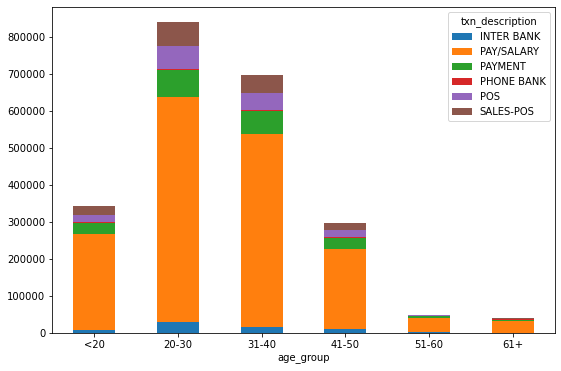

In [28]:
txn_stack = df1.groupby(['age_group', 'txn_description'])['amount'].sum().unstack()
txn_stack

ax = txn_stack.plot(kind = 'bar', stacked = True, figsize = (9,6))
ax.set_xticklabels(txn_stack.index, rotation = 0)

plt.show()


## Transaction

In [29]:
df1.groupby(['txn_description', 'movement'])['amount'].count().reset_index()['amount']

0     742
1     883
2    2600
3     101
4    3783
5    3934
Name: amount, dtype: int64

In [30]:
txn = df1.groupby(['txn_description', 'movement'])['amount'].sum().reset_index()
txn['count'] = df1.groupby(['txn_description', 'movement'])['amount'].count().reset_index()['amount']
txn.sort_values('amount')

,txn_description,movement,amount,count
3,PHONE BANK,debit,10716.00,101
0,INTER BANK,debit,64331.00,742
4,POS,debit,152861.24,3783
5,SALES-POS,debit,157005.11,3934
2,PAYMENT,debit,201794.00,2600
1,PAY/SALARY,credit,1676576.85,883


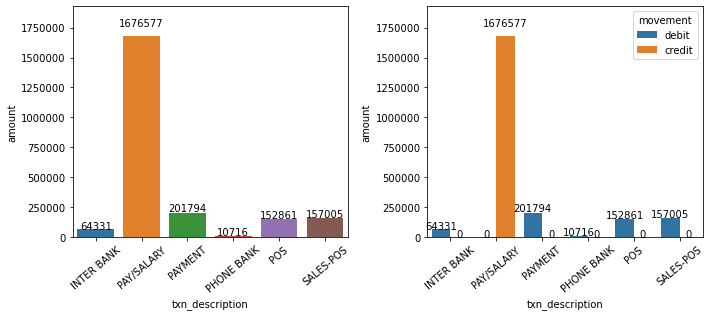

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4.5))

ax[0] = sns.barplot(data = txn, x = 'txn_description', y = 'amount', ax = ax[0])
ax[0].ticklabel_format(style = 'plain', axis = 'y')
ax[0].set_xticklabels(txn['txn_description'], rotation = 40)

ax[1] = sns.barplot(data = txn, x = 'txn_description', y = 'amount', hue = 'movement', ax = ax[1])
ax[1].ticklabel_format(style = 'plain', axis = 'y')
ax[1].set_xticklabels(txn['txn_description'], rotation = 40)

plot_height(txn, ax[0])
plot_height(txn, ax[1])

plt.tight_layout()
plt.show()

## Total and average amount each month

In [32]:
df1['day_name'] = df1['date'].dt.day_name()
df1['month_name'] = df1['date'].dt.month_name()
# df1['date'].dt.month # numbers
df1.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,age_group,day_name,month_name
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,20-30,Wednesday,August
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,20-30,Wednesday,August
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,31-40,Wednesday,August
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,31-40,Wednesday,August
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,20-30,Wednesday,August


In [33]:
# 1
month_amount = df1.groupby(['month_name'])['amount'].sum().reset_index()
month_amount['avg_amount'] = round(df1.groupby(['month_name'])['amount'].mean(),2).reset_index().amount

# 2
month_am_sex = df1.groupby(['month_name', 'gender'])['amount'].sum().reset_index()
month_am_sex['avg_amount'] = round(df1.groupby(['month_name', 'gender'])['amount'].mean(),2).reset_index().amount

# 3
month_age = df1.groupby(['month_name', 'age_group', 'gender'])['amount'].sum().reset_index()
month_age['avg_amount'] = df1.groupby(['month_name', 'age_group', 'gender'])['amount'].mean().reset_index().amount

print(month_amount)
print('')
print(month_am_sex)
print('')
print(month_age)

  month_name     amount  avg_amount
0     August  729935.52      185.12
1    October  802798.47      196.43
2  September  730550.21      182.05

  month_name gender     amount  avg_amount
0     August      F  309397.55      162.93
1     August      M  420537.97      205.74
2    October      F  347430.62      179.27
3    October      M  455367.85      211.90
4  September      F  313494.46      163.19
5  September      M  417055.75      199.36

   month_name age_group gender     amount  avg_amount
0      August       <20      F   54524.99  170.390594
1      August       <20      M   51431.69  168.077418
2      August     20-30      F  110294.69  134.341888
3      August     20-30      M  165675.30  189.127055
4      August     31-40      F   90839.26  200.086476
5      August     31-40      M  126748.92  223.543069
6      August     41-50      F   44076.74  192.474847
7      August     41-50      M   54121.70  250.563426
8      August     51-60      F    6139.40  122.788000
9      August

#### Total amount

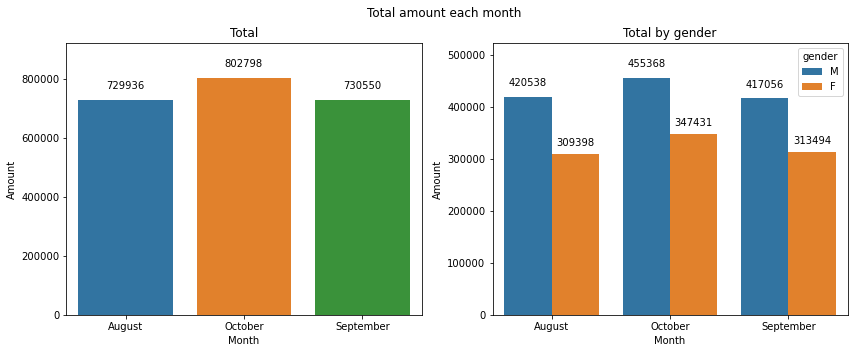

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))
plt.suptitle('Total amount each month')

ax[0] = sns.barplot(data = month_amount, x = 'month_name', y = 'amount', ax = ax[0])
ax[0].set_title('Total')
ax[0].set(xlabel = 'Month', ylabel = 'Amount')

ax[1] = sns.barplot(data = month_am_sex, x = 'month_name', y = 'amount', hue = 'gender', 
                    hue_order = ['M', 'F'], ax = ax[1])
ax[1].set_title('Total by gender')
# ax[1].legend(loc = 'upper left')
ax[1].set(xlabel = 'Month', ylabel = 'Amount')

plot_height(month_amount, ax[0])
plot_height(month_amount, ax[1])

plt.show()

#### Average amount

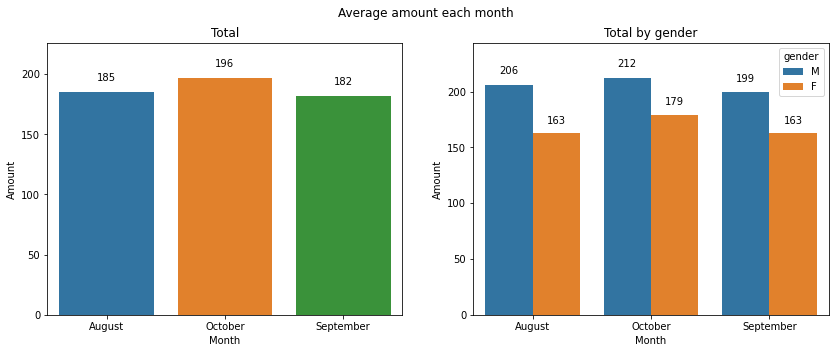

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))
plt.suptitle('Average amount each month')

ax[0] = sns.barplot(data = month_amount, x = 'month_name', y = 'avg_amount', ax = ax[0])
ax[0].set_title('Total')
ax[0].set(xlabel = 'Month', ylabel = 'Amount')

ax[1] = sns.barplot(data = month_am_sex, x = 'month_name', y = 'avg_amount', hue = 'gender', 
                    hue_order = ['M', 'F'], ax = ax[1])
ax[1].set_title('Total by gender')
# ax[1].legend(loc = 'upper left')
ax[1].set(xlabel = 'Month', ylabel = 'Amount')

plot_height(month_amount, ax[0])
plot_height(month_amount, ax[1])

plt.show()

#### By age

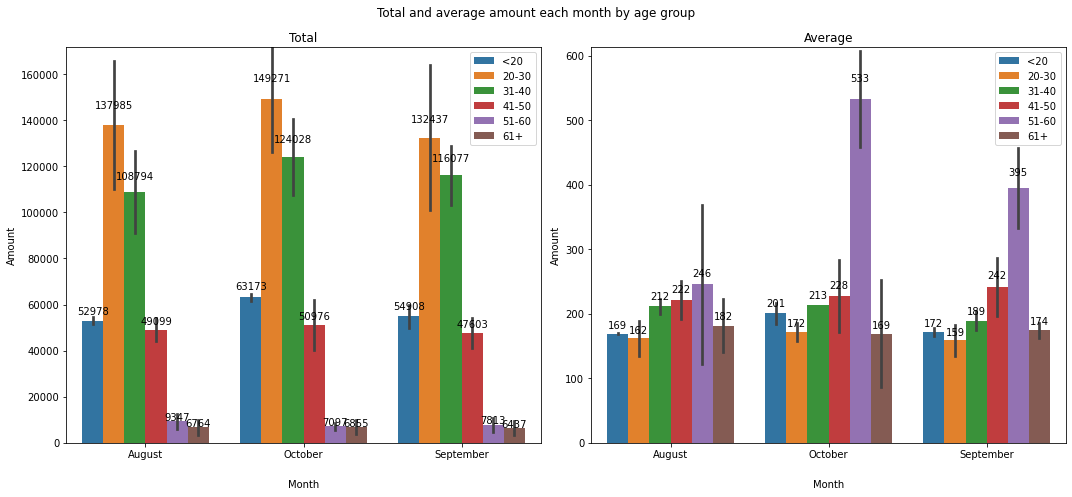

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))
plt.suptitle('Total and average amount each month by age group')

ax[0] = sns.barplot(data = month_age, x = 'month_name', y = 'amount', hue = 'age_group', 
                    ax = ax[0])
ax[0].set_title('Total')
# ax[0].legend(loc = 'best', bbox_to_anchor=(0.25, 0.5), ncol=1)
ax[0].legend(loc = 'best')
ax[0].set(ylabel = 'Amount')
# ax[0].set_ylabel('Amount')
ax[0].set_xlabel('Month', labelpad = 20)

ax[1] = sns.barplot(data = month_age, x = 'month_name', y = 'avg_amount', hue = 'age_group', 
                    ax = ax[1])
ax[1].set_title('Average')
ax[1].legend(loc = 'best')
ax[1].set_ylabel('Amount')
ax[1].set_xlabel('Month', labelpad = 20)

plot_height(month_age, ax[0])
plot_height(month_age, ax[1])

plt.tight_layout()
plt.show()

Calculate individual's transactions and divide by 3 (because there are only 3 months) 

In [37]:
txn_vol = round(df1.groupby(['customer_id', 'gender', 'age_group']).transaction_id.count()/3).reset_index()

In [38]:
txn_vol = round(df1.groupby(['customer_id', 'gender', 'age_group']).transaction_id.count()/3).reset_index()
# Drop rows whose txn_range is null 
txn_vol = txn_vol.drop(axis = 0, index = txn_vol[txn_vol['transaction_id'] == 0].index)
# Reset and drop the existing index to create a new index 
txn_vol = txn_vol.reset_index().drop(columns = 'index')

txn_vol.rename(columns = {'transaction_id' : 'txn_count'}, inplace = True)

txn_vol.head()

,customer_id,gender,age_group,txn_count
0,CUS-1005756958,F,51-60,24.0
1,CUS-1117979751,M,20-30,33.0
2,CUS-1140341822,M,20-30,27.0
3,CUS-1147642491,F,31-40,39.0
4,CUS-1196156254,F,31-40,82.0


In [39]:
# pd.cut(txn_vol, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 999],
# [0, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 999]
# Add txn_range
txn_vol['txn_range'] = pd.cut(txn_vol['txn_count'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 999], 
                     labels = ['0-10','11-20','21-30','31-40','41-50', '51-60', '61-70',
                               '71-80','81-90','91-100','101+'])
txn_vol.head()

,customer_id,gender,age_group,txn_count,txn_range
0,CUS-1005756958,F,51-60,24.0,21-30
1,CUS-1117979751,M,20-30,33.0,31-40
2,CUS-1140341822,M,20-30,27.0,21-30
3,CUS-1147642491,F,31-40,39.0,31-40
4,CUS-1196156254,F,31-40,82.0,81-90


The monthly average transaction volume is 40. 

In [40]:
(df1.groupby('customer_id').transaction_id.count()/3).reset_index().transaction_id.mean()

40.14333333333333

It is clear that most transcations are between 25 and 50.

<AxesSubplot:xlabel='txn_count'>

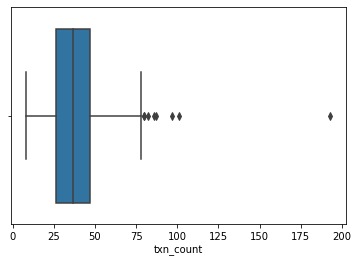

In [41]:
sns.boxplot(data = txn_vol, x = 'txn_count')

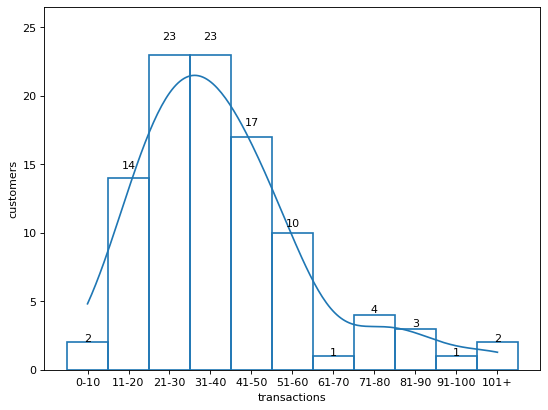

In [42]:
plt.figure(figsize=(8, 6), dpi=80)
ax = sns.histplot(data = txn_vol, x="txn_range", fill = False, kde = True)
# ax = sns.histplot(data = txn_vol, x="transaction_id", fill = False, kde = True, bins = 10, binwidth = 10)
# ax = sns.countplot(data = txn_vol, x = 'txn_range')
ax.set(xlabel = 'transactions', ylabel = 'customers')

plot_height(txn_vol, ax)
plt.show()

There are 23 customers who made transactions between 21 and 30, and 14 of them are men and 9 of them are women.  

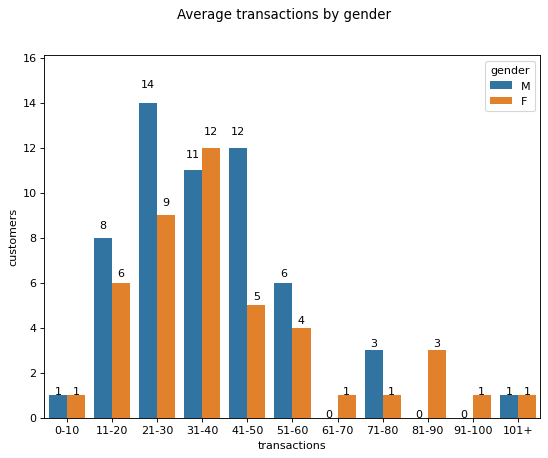

In [43]:
plt.figure(figsize=(8, 6), dpi=80)
plt.suptitle('Average transactions by gender')
ax = sns.countplot(data = txn_vol, x = 'txn_range', hue = 'gender', hue_order = ['M', 'F'])
ax.set(xlabel = 'transactions', ylabel = 'customers')
plot_height(txn_vol, ax)

plt.show()

### Average transaction volume by hour

In [44]:
df1['txn_date'] = df1['extraction'].astype(str).str[:10] # 2018-08-01
df1['txn_hr'] = df1['extraction'].astype(str).str[11:13] # 01:21:15 -> 01
df1.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,age_group,day_name,month_name,txn_date,txn_hr
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,20-30,Wednesday,August,2018-08-01,01
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,20-30,Wednesday,August,2018-08-01,01
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,31-40,Wednesday,August,2018-08-01,01
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,31-40,Wednesday,August,2018-08-01,01
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,20-30,Wednesday,August,2018-08-01,01


In [45]:
hrs = df1['txn_hr'].sort_values().unique().tolist()
hr_count = df1.groupby(['date', 'txn_hr'])['txn_hr'].count().unstack().fillna(0)
# Calculate the mean of each hour 
hr_mean = hr_count[hrs].mean().reset_index().rename(columns = {0: 'mean'})

Visualise the average transaction volume by hour

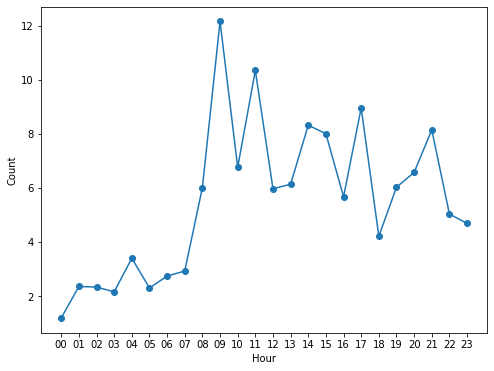

In [50]:
plt.figure(figsize=(8,6))
ax = plt.plot(hr_mean['mean'], marker = 'o')
plt.xticks(np.arange(24), hr_mean['txn_hr'])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()